# Foundations of AI & ML
## Session 07
### Experiment 1 - Part 1
### Applying Multi Layer Perceptron

In [2]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
import numpy as np

In [3]:
# Load the iris dataset
iris = datasets.load_iris()

# Create our X and y data
X = iris.data
y = iris.target

In [4]:
# View ten observations of our y data
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [5]:
# View the corresponding x data.
X[45:55]

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [6]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [9]:
clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
MLPClassifier?

In [10]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = clf.predict(X_test_std)

In [11]:
y_pred

array([0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2,
       2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0,
       0])

In [13]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [14]:
clf.coefs_

[array([[  1.264655  ,   4.59542122,   7.54904784,   8.6027038 ,
           3.26654145,   1.92714824,  -1.35590463],
        [ -8.06998984, -14.34759503,  -4.17208655, -14.50565395,
           0.31079294,   0.11852103,   4.87887388],
        [  3.56072886,  10.31111447,   9.41118837,  14.94963477,
          -5.50969821,  -6.6106923 ,  -5.9339288 ],
        [  3.2944608 ,   8.50886788,   9.55870073,  14.40055178,
          -4.05426001,  -2.55128291,  -7.28972341]]),
 array([[ -2.28153437,   1.56425529,   3.53261205],
        [ -5.67873814,  -5.88650561,   8.4768642 ],
        [  1.72656021,   5.72610389,  -2.52665524],
        [ -6.91473218, -10.04595233,  11.39018297],
        [  3.36265364,   4.76960863,  -5.08606947],
        [  2.72723723,  26.95982753, -10.30787644],
        [  6.2832447 ,  16.49488713, -11.7394894 ]]),
 array([[ -0.89061954,  -6.07273277,   6.63591244],
        [  7.03927063,  12.74333099, -20.17650497],
        [-39.04831941,  11.74009932,  27.55575154]])]

In [15]:
clf.classes_

array([0, 1, 2])

In [17]:
for trial in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, ), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print(y_pred)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[2 0 2 2 1 0 1 2 2 1 1 1 2 0 2 1 1 0 1 0 2 2 0 2 1 0 0 0 0 2 0 1 0 1 2 2 0
 2 0 2 2 1 2 0 0]
Accuracy: 0.91
[0 1 1 2 0 2 2 1 0 1 2 0 0 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 0 2 0 2 2 0 0 1 0
 0 0 0 1 0 0 0 2]
Accuracy: 0.93
[0 2 2 1 0 2 1 0 0 1 2 0 0 0 0 2 2 0 0 2 1 0 2 0 0 0 1 0 2 0 2 2 1 1 1 2 0
 0 2 2 1 1 2 0 1]
Accuracy: 0.98
[0 0 0 1 1 1 2 0 0 0 1 2 0 0 2 0 2 2 0 1 1 2 2 1 1 1 1 0 1 0 2 0 1 2 2 0 0
 1 2 2 2 2 2 1 2]
Accuracy: 0.98
[0 0 1 2 1 0 2 0 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 2 2 2 0 1 1 2 1 2 2 2 2 0 0
 1 1 1 1 1 1 0 2]
Accuracy: 0.96
[0 1 0 0 2 0 1 2 0 2 1 2 1 0 1 2 1 0 2 2 2 1 2 0 0 0 1 0 1 2 0 2 1 2 0 2 1
 2 0 2 2 2 2 2 0]
Accuracy: 0.96
[2 0 0 0 1 1 0 0 0 2 0 2 1 0 0 2 0 1 0 1 1 2 2 0 1 2 0 1 2 1 0 2 2 0 0 0 0
 0 0 1 0 0 0 1 1]
Accuracy: 0.91
[2 2 0 1 2 2 1 1 1 2 0 1 0 1 0 0 2 0 0 2 0 0 2 1 1 1 0 0 2 2 0 1 0 1 1 2 1
 2 0 0 2 1 1 0 1]
Accuracy: 0.93
[0 0 1 1 1 2 1 1 2 2 0 0 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 2 0 2 2 2 2 0 2 0 2
 0 1 0 1 0 1 2 0]
Accuracy: 0.98
[2 0 2 1 1 0 1 2 2 1 1 1 1 1

As you can see this is performing much better; however a few times the neural netweok is getting caught in the local minima

In [18]:
xx, yy, zz, aa = np.mgrid[-0:10:0.5, 0:10:0.5, 0:10:0.5, 0:10:0.5]
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel(), aa.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

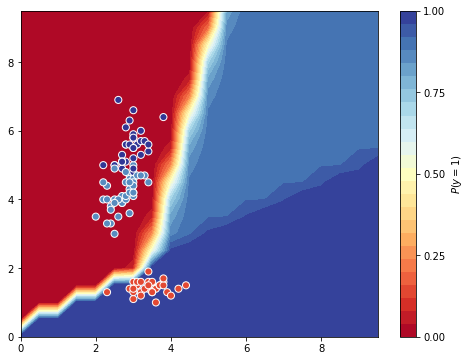

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))
xx, yy = np.mgrid[-0:10:0.5, 0:10:0.5]
contour = ax.contourf(xx, yy, probs[:,:, 0, 0].reshape(20,20), 25, cmap="RdYlBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train[:,1], X_train[:, 2], c=y_train[:], s=50,
           cmap="RdYlBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
plt.show()

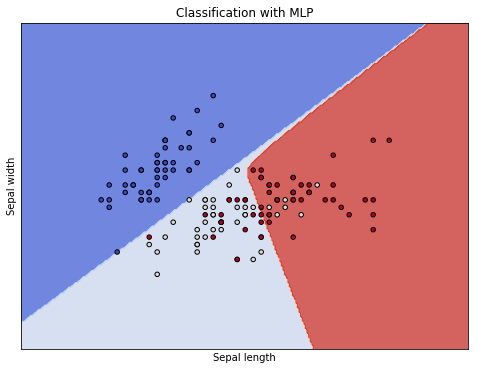

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from utils import *

# Take the first two features. TODO - Try combinations of two features
X = iris.data[:, :2]
y = iris.target

# we create an instance of MLP and fit out data. We do not scale our
# data since we want to plot the vectors
models = [clf]
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = 'Classification with MLP'

# Set-up 2x2 grid for plotting.

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles)

plt.show()